# Marcos Barragán Corredera

https://www.linkedin.com/in/marcos-barragán-corredera-7415931b7

# Adrián González Retamosa

https://www.linkedin.com/in/adrián-gonzález-retamosa-b283a51b3

## Machine Learning

## CUNEF

### 04/12/2020

## Logistic Regression model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from numpy import genfromtxt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, auc, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.feature_selection import RFE
from sklearn import model_selection, metrics, linear_model
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import pyplot

import sklearn.metrics as skm

pd.set_option('display.max_columns', None)

We load the data that we saved in previous scripts as x_train, y_train, x_test and y_test to work directly on them.

In [2]:
x_train = pd.read_csv('../data/x_train.csv')
x_test = pd.read_csv('../data/x_test.csv')
y_train = pd.read_csv('../data/y_train.csv')
y_test = pd.read_csv('../data/y_test.csv')

We have developed several models, but we will only consider the best for our data. 

Once they are loaded, we implement the logistic regression model as:

In [4]:
logistic_m = LogisticRegression(max_iter=1000)
logistic_m.fit(x_train, y_train)

/Users/adrian_gr/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression(max_iter=1000)

Here comes the most important part of the task: saving the training model correctly,because it will be necessary to predict the new dataset we are given.

In [10]:
def saved(nombre, modelo):
    with open(nombre, 'wb') as file:
        pickle.dump(modelo, file)

In [12]:
saved('../modelos/logistic', logistic_m)

Prediction with the logistic regression for the x_test sample.

In [6]:
Y_pred = logistic_m.predict(x_test)

We can plot the confusion matrix by using sklearn libraries.

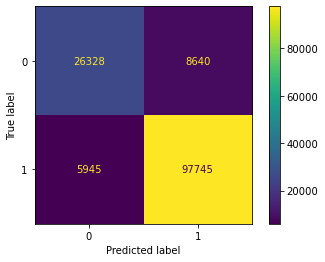

In [7]:
plot_confusion_matrix(logistic_m, X=x_test, y_true=y_test)

In [8]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.75      0.78     34968
           1       0.92      0.94      0.93    103690

    accuracy                           0.89    138658
   macro avg       0.87      0.85      0.86    138658
weighted avg       0.89      0.89      0.89    138658



### ROC

We can check the accuracy of our model by plotting the ROC curve in this case

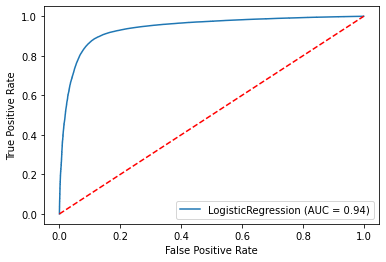

In [9]:
metrics.plot_roc_curve(logistic_m, x_test, y_test)
plt.plot([0, 1], [0, 1],'r--')
plt.show()

### References:

+ https://scikit-learn.org/stable/modules/linear_model.html
+ https://docs.python.org/3/library/pickle.html